In [2]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1 ,1)
end = datetime.date(2024, 11, 2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.text

'{"bpi":{"2017-01-01":964.325,"2017-01-02":1009.9738,"2017-01-03":1028.3338,"2017-01-04":1047.1,"2017-01-05":1140.385,"2017-01-06":985.9388,"2017-01-07":837.8363,"2017-01-08":923.5238,"2017-01-09":889.3388,"2017-01-10":905.2263,"2017-01-11":910.6063,"2017-01-12":772.6613,"2017-01-13":784.8938,"2017-01-14":820.6888,"2017-01-15":821.1963,"2017-01-16":830.74,"2017-01-17":848.5813,"2017-01-18":890.2938,"2017-01-19":888.0625,"2017-01-20":896.1638,"2017-01-21":920.5888,"2017-01-22":934.7775,"2017-01-23":920.365,"2017-01-24":912.2125,"2017-01-25":898.55,"2017-01-26":901.05,"2017-01-27":912.8438,"2017-01-28":919.795,"2017-01-29":920.8288,"2017-01-30":916.9113,"2017-01-31":921.3513,"2017-02-01":973.065,"2017-02-02":982.8275,"2017-02-03":1020.09,"2017-02-04":1011.215,"2017-02-05":1029.4012,"2017-02-06":1019.3125,"2017-02-07":1029.4088,"2017-02-08":1067.7088,"2017-02-09":1072.205,"2017-02-10":974.9588,"2017-02-11":997.2275,"2017-02-12":1004.7138,"2017-02-13":1004.8538,"2017-02-14":994.58,"2017-02

In [4]:
data = pd.read_json(result.text).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

/tmp/ipykernel_77880/4004453840.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(result.text).iloc[:-2,:1]


,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850
...,...
2024-10-29,72672.2583
2024-10-30,72397.7108
2024-10-31,70352.6689


<Axes: xlabel='date'>

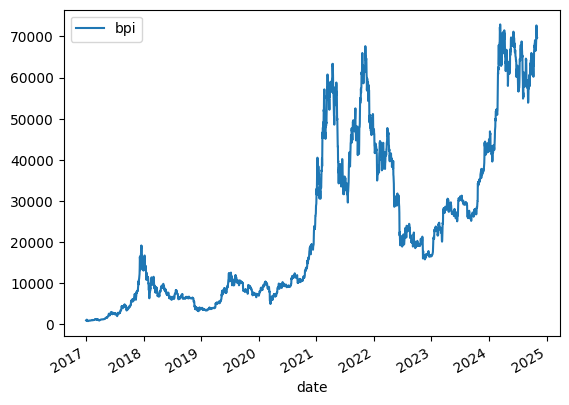

In [5]:
data.plot()

In [6]:
data.groupby(data.index.dayofweek).mean()

,bpi
date,
0,23665.003748
1,23533.028309
2,23605.935367
3,23561.095864
4,23571.972484
5,23724.767959
6,23571.236700


In [7]:
data.groupby(data.index.month).mean()

,bpi
date,
1,20603.689754
2,23034.290973
3,26348.470444
4,26879.109642
5,24726.913700
6,22770.648154
7,22337.976644
8,23618.147987
9,22943.015772


In [9]:
data.groupby(data.index.year).mean()

,bpi
date,
2017,3951.843629
2018,7519.442859
2019,7362.522655
2020,11124.399766
2021,47263.526556
2022,28196.608564
2023,28853.998874
2024,60764.058799


In [10]:
data[:5]

,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850


In [11]:
data[:5].cumsum()

,bpi
date,
2017-01-01,964.3250
2017-01-02,1974.2988
2017-01-03,3002.6326
2017-01-04,4049.7326
2017-01-05,5190.1176


In [13]:
data[:5].pct_change()

,bpi
date,
2017-01-01,NaN
2017-01-02,0.047338
2017-01-03,0.018179
2017-01-04,0.018249
2017-01-05,0.089089


In [14]:
data[:5].expanding().sum()

,bpi
date,
2017-01-01,964.3250
2017-01-02,1974.2988
2017-01-03,3002.6326
2017-01-04,4049.7326
2017-01-05,5190.1176


In [15]:

data[:5].expanding().mean()

,bpi
date,
2017-01-01,964.325000
2017-01-02,987.149400
2017-01-03,1000.877533
2017-01-04,1012.433150
2017-01-05,1038.023520
